This project uses the Kaggle Dataset ["When do children learn words?"](https://www.kaggle.com/rtatman/when-do-children-learn-words)

In [32]:
import pandas as pd #data manipulation & analysis  
import numpy as np #math 
import matplotlib.pyplot as plt #data visualization 
import seaborn as sns #data visualization 
%matplotlib inline 

# Data Initialization 

In [3]:
#import the "main_data" CSV from Data folder
main_df = pd.read_csv("Data/main_data.csv") 

#import the "Norwegian_CDS_frequency" CSV from Data folder 
freq_df = pd.read_csv("Data/Norwegian_CDS_frequency.csv")

## main_data_df feature & metadata EDA 

In [4]:
main_df.head()

,ID_CDI_I,ID_CDI_II,Word_NW,Word_CDI,Translation,AoA,VSoA,Lex_cat,Broad_lex,Freq,CDS_freq
0,i_4_1,i_1_1,'au','au','ouch',16.0,40.0,sound effects,nominals,4366.0,7.0
1,i_4_2,i_1_2,'bææ','bææ','baa baa',15.0,40.0,sound effects,nominals,18.0,5.0
2,i_4_3,i_1_3,'brrr (bil-lyd)','brrr (bil-lyd)','vroom',13.0,20.0,sound effects,nominals,NaN,20.0
3,i_4_4,i_1_4,'gakk gakk','gakk gakk','quack quack',17.0,40.0,sound effects,nominals,16.0,3.0
4,i_4_5,i_1_5,'grr','grr','grr',22.0,220.0,sound effects,nominals,78.0,1.0


In [5]:
main_df.dtypes

ID_CDI_I        object
ID_CDI_II       object
Word_NW         object
Word_CDI        object
Translation     object
AoA            float64
VSoA           float64
Lex_cat         object
Broad_lex       object
Freq           float64
CDS_freq       float64
dtype: object

In [7]:
main_df.shape

(731, 11)

In [6]:
main_df.columns

Index(['ID_CDI_I', 'ID_CDI_II', 'Word_NW', 'Word_CDI', 'Translation', 'AoA',
       'VSoA', 'Lex_cat', 'Broad_lex', 'Freq', 'CDS_freq'],
      dtype='object')

In [8]:
main_df.isna().sum()

ID_CDI_I       341
ID_CDI_II        0
Word_NW          0
Word_CDI         0
Translation      0
AoA             36
VSoA            27
Lex_cat         16
Broad_lex       16
Freq            10
CDS_freq         8
dtype: int64

This dataset contains 731 enteries, 11 columns. There are missing enteries in 7 columns, that will need to be handled before analysis. Reference for columns: 
* IDCDII: Word ID from the Norwegian adaptation of the MacArthur-Bates Communicative Development Inventories, version 1
* IDCDIII: Word ID from the Norwegian adaptation of the MacArthur-Bates Communicative Development Inventories, version 2
* Word_NW: The word in Norwegian
* Word_CDI: The form of the word found in the Norwegian adaptation of the MacArthur-Bates Communicative Development Inventories
* Translation: the English translation of the Norwegian word
* AoA: how old a child generally is was when they this this word, in months (Estimated from the MacArthur-Bates Communicative Development Inventories)
* VSoA: how many other words a child generally knows when they learn this word (rounded up to the nearest 10)
* Lex_cat: the specific part of speech of the word
* Broad_lex: the broad part of speech of the word
* Freq: a measure of how commonly this word occurs in Norwegian
* CDS_Freq: a measure of how commonly this word occurs when a Norwegian adult is talking to a Norwegian child

### DF Data Cleaning 

In [10]:
main_df.loc[main_df['ID_CDI_I'].isna()]

,ID_CDI_I,ID_CDI_II,Word_NW,Word_CDI,Translation,AoA,VSoA,Lex_cat,Broad_lex,Freq,CDS_freq
9,NaN,i_1_10,'oi (uttrykk for overraskelse)','oi (uttrykk for overraskelse)','oh',20.0,80.0,sound effects,nominals,5019.0,437.0
20,NaN,i_2_9,'et esel','esel','donkey',32.0,560.0,common nouns,nominals,1292.0,9.0
27,NaN,i_2_16,'en hane','hane','rooster',25.0,440.0,common nouns,nominals,1508.0,1.0
29,NaN,i_2_18,'ei høne','høne','hen',24.0,280.0,common nouns,nominals,4401.0,5.0
34,NaN,i_2_23,'en krokodille','krokodille','crocodile',24.0,280.0,common nouns,nominals,1190.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...
726,NaN,i_22_5,'hvis','hvis','if',35.0,660.0,closed-class items,closed-class,498529.0,86.0
727,NaN,i_22_6,'men','men','but',33.0,600.0,closed-class items,closed-class,3015440.0,444.0
728,NaN,i_22_7,'og','og','and',25.0,400.0,closed-class items,closed-class,16079937.0,1074.0
729,NaN,i_22_8,'så','så','then',31.0,580.0,closed-class items,closed-class,2141716.0,900.0


341 rows in this column are NaN, there is a second ID column ID_CDI_II which has no NaN values, to handle these NaN values I am going to drop the first column

In [11]:
main_df = main_df.drop(columns =['ID_CDI_I'])

In [12]:
main_df.head()

,ID_CDI_II,Word_NW,Word_CDI,Translation,AoA,VSoA,Lex_cat,Broad_lex,Freq,CDS_freq
0,i_1_1,'au','au','ouch',16.0,40.0,sound effects,nominals,4366.0,7.0
1,i_1_2,'bææ','bææ','baa baa',15.0,40.0,sound effects,nominals,18.0,5.0
2,i_1_3,'brrr (bil-lyd)','brrr (bil-lyd)','vroom',13.0,20.0,sound effects,nominals,NaN,20.0
3,i_1_4,'gakk gakk','gakk gakk','quack quack',17.0,40.0,sound effects,nominals,16.0,3.0
4,i_1_5,'grr','grr','grr',22.0,220.0,sound effects,nominals,78.0,1.0


In [100]:
main_df.loc[main_df['VSoA'] == 660.0]

,ID_CDI_II,Word_NW,Word_CDI,Translation,AoA,VSoA,Lex_cat,Broad_lex,Freq,CDS_freq
25,i_2_14,'ei gås','gås','goose',36.0,660.0,common nouns,nominals,1491.0,2.0
45,i_2_34,'et reinsdyr','reinsdyr','reindeer',36.0,660.0,common nouns,nominals,1317.0,3.0
54,i_2_43,'en valp','valp','puppy',34.0,660.0,common nouns,nominals,26852.0,2.0
80,i_4_11,'et kritt','kritt','chalk',35.0,660.0,common nouns,nominals,550.0,1.0
126,i_5_40,'nugatti','nugatti','Nugatti',36.0,660.0,common nouns,nominals,209.0,1.0
224,i_8_12,'en gåbil','gåbil','toy car',36.0,660.0,common nouns,nominals,3.0,1.0
273,i_9_11,'gyngestol','gyngestol','rocking chair',35.0,660.0,common nouns,nominals,188.0,1.0
291,i_9_29,'en tørketrommel','tørketrommel','dryer',35.0,660.0,common nouns,nominals,767.0,4.0
343,i_11_16,'en park','park','park',34.0,660.0,places to go,nominals,14131.0,19.0
376,i_12_27,'en oldefar','oldefar','great-grandfather',33.0,660.0,people,nominals,1234.0,1.0


There are 36 values in the AoA column that are NaN. There is some correlation between this value and the value found in the VSoA column. A VSoA value of 660.0 equals as AoA value of between 34.0 - 36.0. As such I am going to fill in missing AoA values with a known VSoA value of 660.0 to the mean of the known AoA range = 35.0 

In [13]:
#replace the nan values in AoA based on VSoA
main_df['AoA'] = np.where((main_df['AoA'].isna()) & ((main_df['VSoA'] == 660.0)), 35.0, main_df['AoA']) 
main_df['AoA'] = np.where((main_df['AoA'].isna()) & ((main_df['VSoA'] == 680.0)), 35.0, main_df['AoA'])

In [14]:
#sanity check
main_df.loc[main_df['AoA'].isna()]

,ID_CDI_II,Word_NW,Word_CDI,Translation,AoA,VSoA,Lex_cat,Broad_lex,Freq,CDS_freq
93,i_5_6,'en bønne','bønner','beans',NaN,NaN,common nouns,nominals,3285.0,1.0
104,i_5_18,'frokostblanding','frokostblanding','cereal',NaN,NaN,common nouns,nominals,686.0,1.0
137,i_5_51,'ristet brød','ristet brød','toast',NaN,NaN,common nouns,nominals,108.0,1.0
185,i_7_1,'en ankel','ankel','ankle',NaN,NaN,common nouns,nominals,3147.0,1.0
232,i_8_20,'kjøkkenrull','kjøkkenrull','roll of paper towels',NaN,NaN,common nouns,nominals,9.0,1.0
237,i_8_25,'ei krukke','krukke','jar',NaN,NaN,common nouns,nominals,1312.0,1.0
265,i_9_3,'en balkong','balkong','balcony',NaN,NaN,common nouns,nominals,3835.0,2.0
298,i_10_2,'bakgård','bakgård','backyard',NaN,NaN,places to go,nominals,2581.0,1.0
332,i_11_5,'en campingplass','campingplass','camping site',NaN,NaN,places to go,nominals,3425.0,1.0
341,i_11_14,'landet','landet','the countryside',NaN,NaN,places to go,nominals,NaN,NaN


The final NaN values in AoA are without reference value in the VSoA, so I will drop these columns. 

In [15]:
main_df = main_df.dropna(subset=['AoA'])

In [16]:
main_df.loc[main_df['Lex_cat'].isna()]

,ID_CDI_II,Word_NW,Word_CDI,Translation,AoA,VSoA,Lex_cat,Broad_lex,Freq,CDS_freq
583,i_16_1,'en dag','dag','day',26.0,360.0,NaN,NaN,1074722.0,62.0
584,i_16_2,'etter','etter','after',31.0,580.0,NaN,NaN,1137455.0,23.0
586,i_16_4,'etterpå','etterpå','afterwords',25.0,360.0,NaN,NaN,36076.0,29.0
587,i_16_5,'før','før','before',30.0,580.0,NaN,NaN,598533.0,41.0
589,i_16_7,'i dag','i dag','today',27.0,440.0,NaN,NaN,394236.0,2.0
590,i_16_8,'i går','i går','yesterday',30.0,580.0,NaN,NaN,83408.0,7.0
591,i_16_9,'i kveld','i kveld','tonight',32.0,620.0,NaN,NaN,2709.0,2.0
592,i_16_10,'i morgen','i morgen','tomorrow',28.0,460.0,NaN,NaN,37720.0,7.0
593,i_16_11,'en kveld','kveld','evening',28.0,520.0,NaN,NaN,123627.0,2.0
594,i_16_12,'morgen','morgen','morning',28.0,520.0,NaN,NaN,46248.0,2.0


The Lex_cat NaN words corespont to the Broad_lex NaN values, removing these columns will solve for Nans in both. 

In [17]:
main_df = main_df.dropna(subset=['Lex_cat'])

In [18]:
main_df.loc[main_df['Freq'].isna()]

,ID_CDI_II,Word_NW,Word_CDI,Translation,AoA,VSoA,Lex_cat,Broad_lex,Freq,CDS_freq
2,i_1_3,'brrr (bil-lyd)','brrr (bil-lyd)','vroom',13.0,20.0,sound effects,nominals,NaN,20.0
12,i_2_1,'(meite)mark','(meite)mark','(earth)worm',28.0,460.0,common nouns,nominals,NaN,NaN
92,i_5_5,'bolle','boller','buns',20.0,120.0,common nouns,nominals,NaN,NaN
221,i_8_10,'fat','fat','(large) plate',26.0,400.0,common nouns,nominals,NaN,NaN
352,i_12_3,'barnets navn','barnets navn','child's own name',20.0,100.0,people,nominals,NaN,317.0
353,i_12_4,'barnevaktens navn','barnevaktens navn','babysitter's name',25.0,360.0,people,nominals,NaN,NaN
375,i_12_26,'navn på kjæledyr','navn på kjæledyr','pet's name',25.0,240.0,people,nominals,NaN,NaN
443,i_14_31,'å huske','huske','swing',25.0,300.0,action words,predicates,NaN,NaN
455,i_14_43,'å koste','koste',cost/sweep',26.0,400.0,action words,predicates,NaN,NaN


The Freq Nan & CDS_freq do not provide a whole picture of the word so I will drop these nans as well. 

In [19]:
main_df = main_df.dropna(subset=['Freq', 'CDS_freq'])

In [20]:
#confirm all nans removed 
main_df.isna().sum()

ID_CDI_II      0
Word_NW        0
Word_CDI       0
Translation    0
AoA            0
VSoA           0
Lex_cat        0
Broad_lex      0
Freq           0
CDS_freq       0
dtype: int64

## Norwegian_CDS_frequency_df feature & metadata EDA

In [40]:
freq_df.head()

,Word_CDI,Translation,Freq_NoWaC,Freq_CDS
0,'au','ouch',4366.0,7.0
1,'bææ','baa baa',18.0,5.0
2,'brrr (bil-lyd)','vroom',NaN,20.0
3,'gakk gakk','quack quack',16.0,3.0
4,'grr','grr',78.0,1.0


In [41]:
freq_df.dtypes

Word_CDI        object
Translation     object
Freq_NoWaC     float64
Freq_CDS       float64
dtype: object

In [42]:
freq_df.shape

(731, 4)

In [43]:
freq_df.columns

Index(['Word_CDI', 'Translation', 'Freq_NoWaC', 'Freq_CDS'], dtype='object')

In [44]:
freq_df.isna().sum()

Word_CDI        0
Translation     0
Freq_NoWaC     10
Freq_CDS        8
dtype: int64

This dataset contains 731 entries and 4 columns. 2 columns have null values that will have to be resolved before analysis. Reference for columns: 
* Word_CDI: The word from, as found in the Norwegian adaptation of the MacArthur-Bates Communicative Development Inventories
* Translation: The English translation of the Norwegian word
* Freq_NoWaC: How often this word is used on the internet
* Freq_CDS: How often this word is used when talking to children (based on two Norwegian CHILDES corpora)

### DF Data Cleaning 

In [126]:
freq_df.loc[freq_df['Freq_NoWaC'].isna()]

,Word_CDI,Translation,Freq_NoWaC,Freq_CDS
2,'brrr (bil-lyd)','vroom',NaN,20.0
12,'(meite)mark','(earth)worm',NaN,NaN
92,'boller','buns',NaN,NaN
221,'fat','(large) plate',NaN,NaN
341,'landet','the countryside',NaN,NaN
352,'barnets navn','child's own name',NaN,317.0
353,'barnevaktens navn','babysitter's name',NaN,NaN
375,'navn på kjæledyr','pet's name',NaN,NaN
443,'huske','swing',NaN,NaN
455,'koste',cost/sweep',NaN,NaN


This set of NaN values only accounts for 10 words (8 of which also have NaN values for Freq_CDS fields) to handle these I will drop them from the dataframe. 

In [127]:
freq_df = freq_df.dropna()

In [128]:
#sanity check 
freq_df.isna().sum()

Word_CDI       0
Translation    0
Freq_NoWaC     0
Freq_CDS       0
dtype: int64

# Exploratory Analysis 

In [21]:
#join dataframes on the Word CDI 
df = pd.merge(main_df, freq_df, on='Word_CDI')
df.head()

,ID_CDI_II,Word_NW,Word_CDI,Translation_x,AoA,VSoA,Lex_cat,Broad_lex,Freq,CDS_freq,Translation_y,Freq_NoWaC,Freq_CDS
0,i_1_1,'au','au','ouch',16.0,40.0,sound effects,nominals,4366.0,7.0,'ouch',4366.0,7.0
1,i_1_2,'bææ','bææ','baa baa',15.0,40.0,sound effects,nominals,18.0,5.0,'baa baa',18.0,5.0
2,i_1_4,'gakk gakk','gakk gakk','quack quack',17.0,40.0,sound effects,nominals,16.0,3.0,'quack quack',16.0,3.0
3,i_1_5,'grr','grr','grr',22.0,220.0,sound effects,nominals,78.0,1.0,'grr',78.0,1.0
4,i_1_6,'kykeliky','kykeliky','cock-a-doodle-doo',22.0,220.0,sound effects,nominals,8.0,2.0,'cock-a-doodle-doo',8.0,2.0


In [22]:
df['Broad_lex'].value_counts()

nominals            378
predicates          168
closed-class        137
games & routines     29
Name: Broad_lex, dtype: int64

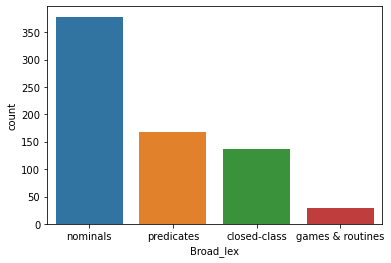

In [25]:
#visualize the distribution on broad lex categories 
ax = sns.countplot(x='Broad_lex', data=df)

In [26]:
#isolate just the games & routine words 
df.loc[df['Broad_lex'] == 'games & routines']

,ID_CDI_II,Word_NW,Word_CDI,Translation_x,AoA,VSoA,Lex_cat,Broad_lex,Freq,CDS_freq,Translation_y,Freq_NoWaC,Freq_CDS
386,i_13_1,'”kommer og tar deg” lek','”kommer og tar deg” lek',''gonna get you' game',24.0,320.0,games & routines,games & routines,73.0,1.0,''gonna get you' game',73.0,1.0
387,i_13_2,'å bade','bade','bathe',17.0,60.0,games & routines,games & routines,8123.0,16.0,'bathe',8123.0,16.0
388,i_13_3,'frokost','frokost','breakfast',23.0,320.0,games & routines,games & routines,15287.0,1.0,'breakfast',15287.0,1.0
389,i_13_4,'å gå på do','gå på do','go to the bathroom',24.0,300.0,games & routines,games & routines,1252.0,1.0,'go to the bathroom',1252.0,1.0
390,i_13_5,'god natt','god natt','good night',19.0,80.0,games & routines,games & routines,2520.0,1.0,'good night',2520.0,1.0
391,i_13_6,'hadet','ha det','bye',14.0,40.0,games & routines,games & routines,467.0,6.0,'bye',467.0,6.0
392,i_13_7,'hallo','hallo','hello',20.0,140.0,games & routines,games & routines,3699.0,61.0,'hello',3699.0,61.0
393,i_13_8,'handle','handle','shop',26.0,440.0,games & routines,games & routines,109640.0,2.0,'shop',109640.0,2.0
394,i_13_9,'hei','hei','hi',13.0,40.0,games & routines,games & routines,64086.0,74.0,'hi',64086.0,74.0
395,i_13_10,'hysj','hysj','hush',18.0,60.0,games & routines,games & routines,353.0,1.0,'hush',353.0,1.0


The vast majority of these words are 'nominals' - a word of phrase that functions like a noun phrase (guitar, coffee, table ect) 

Predicates are essentially verbs, closed-class are words that the language does not usually add new words to (prepositions, pronouns, determiners). Finally games & routines seems to be social words like hello/goodbye/ wait.

In [27]:
#the first area of this I want to investigate are the games & routines saving a new g&r slice of the main df
gr = df.loc[df['Broad_lex'] == 'games & routines'] 

In [38]:
ax = sns.histplot(data=gr, y='AoA')

AttributeError: module 'seaborn' has no attribute 'histplot'